## Task 1: Introduction

Starter notebook for the Coursera Guided Project [Creating Multi Task Models With Keras](https://www.coursera.org/projects/multi-task-models-keras)

In [ ]:
%matplotlib inline
%load_ext tensorboard

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shutil

try:
  shutil.rmtree('logs')
except:
  pass

## Task 2: Create Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def create_example(x,y):
  c = np.random.randint(0,2)
  image = 0.5 * np.random.rand(28,28,3)
  image[:,:,c] += 0.5*x/255.
  return image, y, c

digit:0, color:green


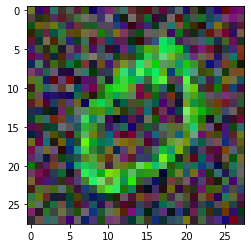

In [ ]:
colors = {0:'red',1:'green'}

x,y,c = create_example(x_train[1],y_train[1])
print(f'digit:{y}, color:{colors[c]}')

plt.imshow(x)
plt.show()

## Task 3: Dataset Generator

In [ ]:
def generate_data(x, y, batch_size = 32):
  num_example = len(y)

  while(True):
    x_batch = np.zeros((batch_size, 28, 28,3))
    y_batch = np.zeros((batch_size, ))
    c_batch = np.zeros((batch_size, ))

    for i in range(0, batch_size):
      index = np.random.randint(0, num_example)
      image, digit, color = create_example(x[index], y[index])
      x_batch[i] = image 
      y_batch[i] = digit
      c_batch[i] = color

    yield x_batch, [y_batch, c_batch]

In [ ]:
x, [y, c] = next(generate_data(x_test, y_test, batch_size=1))

[9.] [0.]


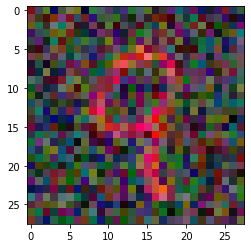

In [ ]:
print(y, c)
plt.imshow(x[0]);

## Task 4: Create Model

## Task 5: Training the Model

In [ ]:
class Logger(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    digit_accuracy = logs.get('digit_accuracy')
    color_accuracy = logs.get('color_accuracy')
    val_digit_accuracy = logs.get('val_digit_accuracy')
    val_color_accuracy = logs.get('val_color_accuracy')
    print('='*30, epoch + 1, '='*30)
    print(f'digit_accuracy: {digit_accuracy:.2f}, color_accuracy: {color_accuracy:.2f}')
    print(f'val_digit_accuracy: {val_digit_accuracy:.2f}, val_color_accuracy: {val_color_accuracy:.2f}')

In [ ]:
%tensorboard --logdir logs

## Task 6: Final Predictions

In [ ]:
def test_model(show=True):
  x, [y, c] = next(test)
  
  preds = model.predict(x)
  pred_digit = np.argmax(preds[0])
  pred_color = int(preds[1] > 0.5)
  gt_digit = int(y[0])
  gt_color = int(c[0])
  
  plt.imshow(x[0])
  if show:
    print(f'GT: {gt_digit}, {colors[gt_color]}')
    print(f'Pr: {pred_digit}, {colors[pred_color]}')
    plt.show()
  else:
    col = 'green' if gt_digit == pred_digit and gt_color == pred_color else 'red'
    plt.ylabel(f'GT: {gt_digit}, {colors[gt_color]}', color=col)
    plt.xlabel(f'Pr: {pred_digit}, {colors[pred_color]}', color=col)
    plt.xticks([])
    plt.yticks([])


test = generate_data(x_test, y_test, batch_size=1)